# Packages

In [1]:
# Diagnostic & memory management
import time # for performance checks
import datetime # for log
from datetime import timedelta
import psutil # for memory checks
from psutil._common import bytes2human
import gc # garbage collector - clean up memory

# Data analysis
import pandas as pd
import geopandas as gpd
import numpy as np

# Raster processing
import rasterio as rio

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data paths

In [2]:
# General Paths
preppedDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/prepped_data/'
rawDat_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/data/raw/'
output_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/'
interimFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/output/intermediate_files/'
workFiles_path = 'C:/Users/roro_/Documents/University/UG year 3/6SSG0610 IGS Independent Geographical Study/work files/'

In [3]:
AOI_path = preppedDat_path+'Study_area_basedOn_UK_BFC_EPSG27700.gpkg' # Study area

# From SDS2 CW2  
Could be used for dual-axis plot of land impact VS energy prod

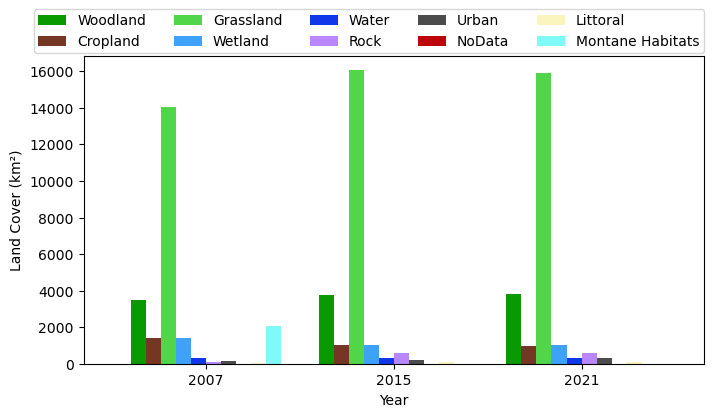

In [9]:
# Total cover plot
fig,ax=plt.subplots(figsize=(8,4))
zs_tot.loc[zs_tot['NPARK21NM']=='TOTAL','Year':].plot.bar(ax=ax, x='Year', width=0.8, color=('#089a00','#753623','#52d649','#3ea2fa','#1038e8','#b986fc','#4c4c4d','#bd040a','#faf5be','#7ffaf8'))
plt.legend(bbox_to_anchor=(0.46, 1.08), loc='center', borderpad=0.3, ncol=5)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Land Cover (km²)')
plt.savefig('images/total_landcover_per_class.png',dpi=300, bbox_inches='tight')
plt.show()

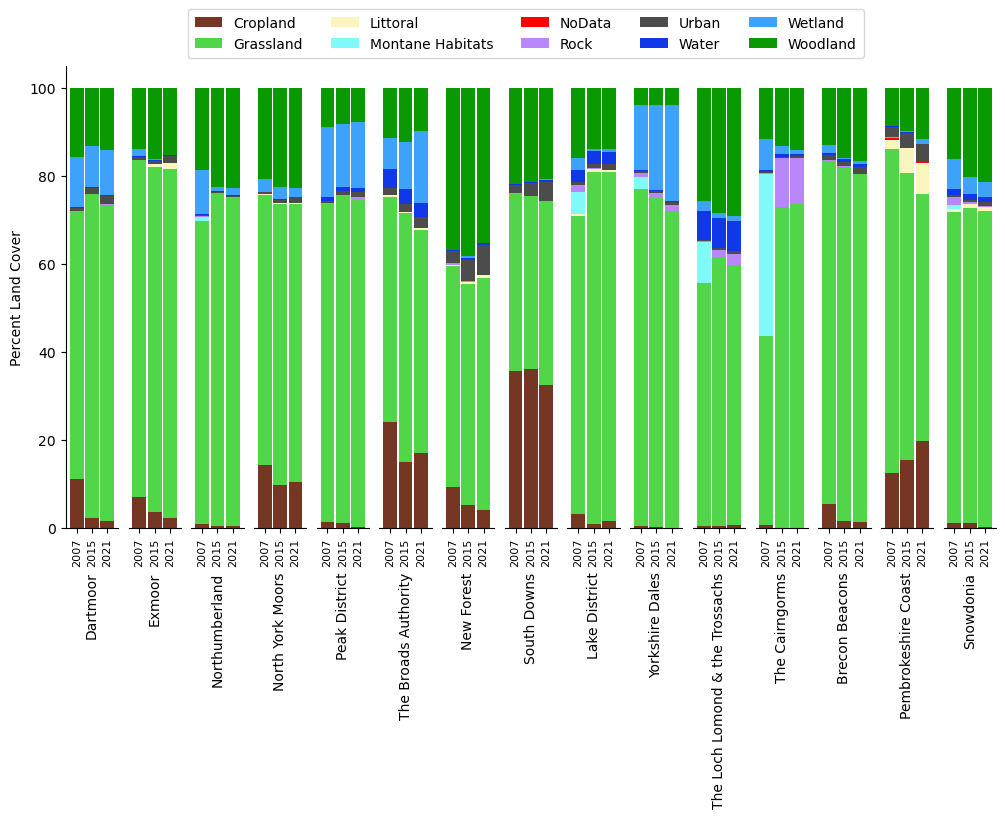

In [74]:
# Better visual display by using many plots at park level
fig, ax = plt.subplots(1,15,figsize = (12,6))
for i,j in zip(melted['Park short name'].unique(),range(len(melted['Park short name'].unique()))):
    sub = melted[melted['Park short name']==i]
    sub.rename(columns={'Year':i}, inplace=True)
    sub= sub.set_index([i,'Cover']).Percent
    sub.unstack().plot(ax=ax[j], kind='bar', stacked=True, width=0.9, legend=False,
                        color=('#753623','#52d649','#faf5be','#7ffaf8','red','#b986fc','#4c4c4d','#1038e8','#3ea2fa','#089a00'))
    #plt.xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].set_xlabel(ax[j].get_xlabel(), rotation=90)
    ax[j].tick_params(axis='x',labelsize=8)
    if j==0:
        ax[j].spines[['right', 'top']].set_visible(False)
        ax[j].set_ylabel('Percent Land Cover')
    else:
        ax[j].spines[['left','right', 'top']].set_visible(False)
        ax[j].get_yaxis().set_visible(False)

plt.legend(bbox_to_anchor=(-8, 1.07), loc='center', borderpad=0.5, ncol=5)
plt.savefig('images/landcover_percent.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Energy output

In [4]:
# Energy df
ener_df = pd.read_excel(f'{output_path}stats/Comparison Energy scenarii.xlsx')
ener_df.set_index('Scenario', inplace = True)
ener_df

Unnamed: 0  Solar area (km²)  Solar area (% of GB)  \
Scenario                                                       
S1                 0          354.5168              0.154043   
S1 thr             0          340.2999              0.147865   
S2                 0        36760.8920             15.973135   
S2 thr             0        36094.7855             15.683702   
S3                 0        29906.2192             12.994681   
S3 thr             0        29395.6756             12.772843   
S4                 0         5047.0247              2.193005   
S4 thr             0         4810.5856              2.090268   
S5                 0         2305.2699              1.001673   
S5 thr             0         2189.1591              0.951221   
S6                 0         2305.2699              1.001673   
S6 thr             0         2197.0221              0.954638   
S7                 0         2707.8273              1.176590   
S7 thr             0         2569.7516              1.116594   

          Solar Annual production, solar only (TWh) (PVOUT)  \
Scenario                                                      
S1                                                18.077757   
S1 thr                                            17.354713   
S2                                              1800.631413   
S2 thr                                          1768.405266   
S3                                              1465.419249   
S3 thr                                          1440.643212   
S4                                               247.587081   
S4 thr                                           235.976846   
S5                                               116.936744   
S5 thr                                           111.056709   
S6                                               116.936744   
S6 thr                                           111.455168   
S7                                               136.166947   
S7 thr                                           129.241350   

          Solar Energy density, solar only (GWh/km²) (PVOUT)  \
Scenario                                                       
S1                                                50.992667    
S1 thr                                            50.998291    
S2                                                48.982256    
S2 thr                                            48.993372    
S3                                                49.000485    
S3 thr                                            49.008678    
S4                                                49.056047    
S4 thr                                            49.053663    
S5                                                50.725836    
S5 thr                                            50.730305    
S6                                                50.725836    
S6 thr                                            50.730108    
S7                                                50.286422    
S7 thr                                            50.293324    

          Solar Annual production, solar only (TWh) (equation)  \
Scenario                                                         
S1                                                39.669618      
S1 thr                                            38.079609      
S2                                              3927.583933      
S2 thr                                          3856.942691      
S3                                              3196.161885      
S3 thr                                          3141.864333      
S4                                               541.756541      
S4 thr                                           516.274901      
S5                                               257.149290      
S5 thr                                           244.192866      
S6                                               257.149290      
S6 thr                                           245.068804      
S7                         

## Basic plot

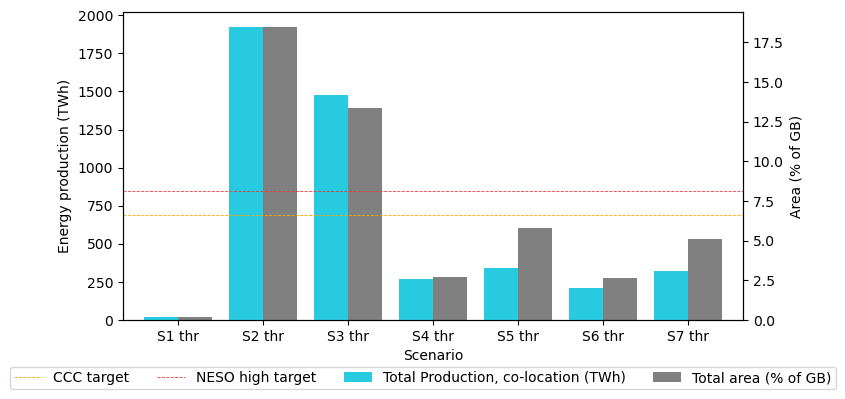

In [65]:
# Basic plot of totals
# Select columns to plot
cols_leftY = []
for i in range(1,8):
    cols_leftY.append(f'S{i} thr')
cols_leftY
cols_rightY = []
for i in range(1,8):
    cols_rightY.append(f'S{i} thr')
cols_rightY

# Plot
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
ener_df.loc[cols_leftY,'Total Production, co-location (TWh)'].plot.bar(ax=ax1, width=0.4, position = 1, color = '#28cae0')
ener_df.loc[cols_rightY,'Total area (% of GB)'].plot.bar(ax=ax, width=0.4, position = 0, color = 'grey')
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.axhline(y=692, color = 'orange', linewidth = 0.6, linestyle = '--', label = 'CCC target') # Add target info
ax1.axhline(y=845, color = '#e53f3a', linewidth = 0.6, linestyle = '--', label = 'NESO high target') # Add target info
# Get labels to be able to order manually in legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
handles = handles2 + handles1
labels = labels2 + labels1
fig.legend(handles, labels, loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.08))
# Axes labels
ax1.set_ylabel(f'Energy production (TWh)')
ax.set_ylabel('Area (% of GB)')
ax.set_xlim(left=-0.65)

# Save
plt.savefig(f'{workFiles_path}media/charts/Energy output.png',dpi=300, bbox_inches='tight')

plt.show()

## Stacked bar plot

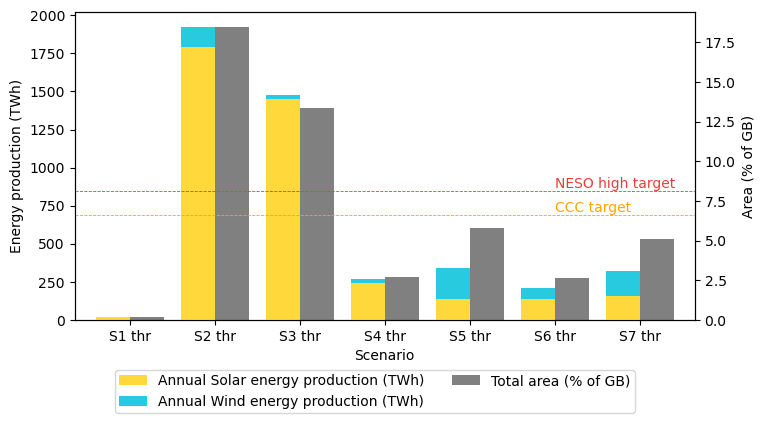

In [169]:
# Stacked bar plot
# Select columns to plot
cols_leftY = []
for i in range(1,8):
    cols_leftY.append(f'S{i} thr')
cols_leftY
cols_rightY = []
for i in range(1,8):
    cols_rightY.append(f'S{i} thr')
cols_rightY

# Energy Parameters to plot on the stacked left axis
ener_plot = ['Total Solar Production, co-location (TWh) (PVOUT)', 'Total Wind Production, co-location (TWh)']

# Plot
fig,ax=plt.subplots(figsize=(8,4))
ax1 = ax.twinx()
ener_df.loc[cols_leftY, ener_plot].plot.bar(ax=ax1, width=0.4, position = 1, stacked=True, color = ['#ffd93c','#28cae0'], legend=False)
ener_df.loc[cols_rightY,'Total area (% of GB)'].plot.bar(ax=ax, width=0.4, position = 0, color = 'grey')
ax1.yaxis.tick_left() # moving y axis to opposite side
ax1.yaxis.set_label_position('left') # moving y axis to opposite side
ax.yaxis.tick_right() # moving y axis to opposite side
ax.yaxis.set_label_position('right') # moving y axis to opposite side
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
ax1.axhline(y=692, color = 'orange', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=5, y=692 +20, color = 'orange', s='CCC target', fontsize = 10)
ax1.axhline(y=845, color = '#e53f3a', linewidth = 0.6, linestyle = '--') # Add target info
ax1.text(x=5, y=845 +20, color = '#e53f3a', s='NESO high target',  fontsize = 10)
# Get labels to be able to order manually in legend
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax1.get_legend_handles_labels()
handles = handles2 + handles1
labels = ['Annual Solar energy production (TWh)', 'Annual Wind energy production (TWh)'] + labels1
fig.legend(handles, labels, loc='lower center', borderpad=0.3, ncol=2, bbox_to_anchor=(0.5, -0.14))
# Axes labels
ax1.set_ylabel(f'Energy production (TWh)')
ax.set_ylabel('Area (% of GB)')
ax.set_xlim(left=-0.65)

# Save
plt.savefig(f'{workFiles_path}media/charts/Energy output.png',dpi=300, bbox_inches='tight')

plt.show()

# Land stats charts

## Area

In [146]:
### Plot AREA stats ###
# Requires cat = string for name of category, to find in Comparison {cat} stats.xlsx
# catnm = name of class to display in left Y axis
# and color = list of colors for bars
def plot_stats(cat, catnm, color, width1):
    # Select stats df
    stats_df = pd.read_excel(f'{output_path}stats/Comparison {cat} stats.xlsx')
    stats_dfT = stats_df.set_index('Unnamed: 0')
    stats_dfT = stats_dfT.T # transpose for plotting
    stats_dfT.drop(columns=0, inplace=True) # drop the pesky 0 column that gets created when writing to Excel
    # Select columns to plot
    cols_leftY = []
    for i in range(1,8):
        cols_leftY.append(f'S{i}_thr_Total Area (% of category area)')
    cols_leftY
    cols_rightY = []
    for i in range(1,8):
        cols_rightY.append(f'S{i} thr')
    cols_rightY
    
    # Plot
    fig,ax=plt.subplots(figsize=(8,4))
    ax1 = ax.twinx()
    stats_dfT.loc[cols_leftY].plot.bar(ax=ax1, width=width1, color = color)
    ener_df.loc[cols_rightY,'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
    plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
    ax1.yaxis.tick_left() # moving y axis to opposite side
    ax1.yaxis.set_label_position('left') # moving y axis to opposite side
    ax.yaxis.tick_right() # moving y axis to opposite side
    ax.yaxis.set_label_position('right') # moving y axis to opposite side
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
    ax1.set_ylabel(f'% of {catnm} class')
    ax.set_ylabel('Energy output (TWh)')
    # Save to file
    plt.savefig(f'{workFiles_path}media/charts/{cat} area stats.png',dpi=300, bbox_inches='tight')
    
    plt.show()

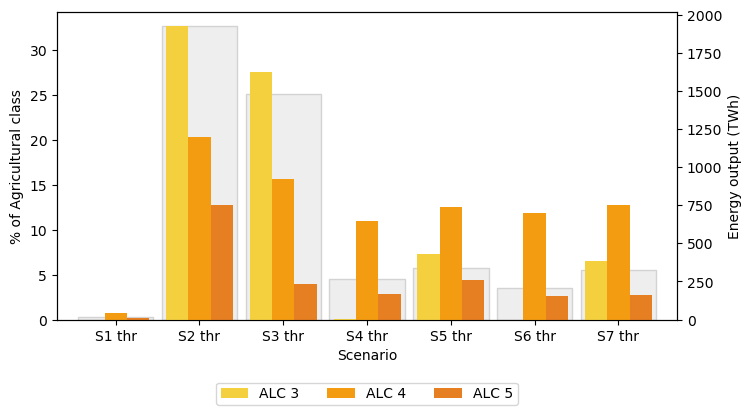

In [147]:
# Agri
plot_stats('Agri', 'Agricultural', ['#f4d03f','#f39c12','#e67e22'],0.8)

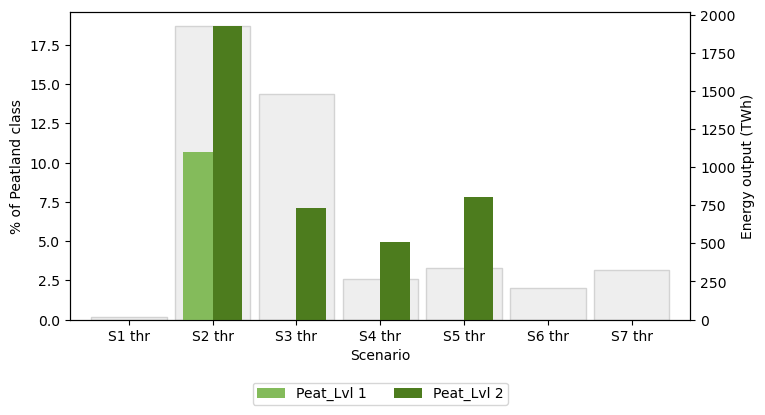

In [148]:
# Peat
plot_stats('Peat','Peatland', ['#84bb5b','#4d7c1e'],0.7)

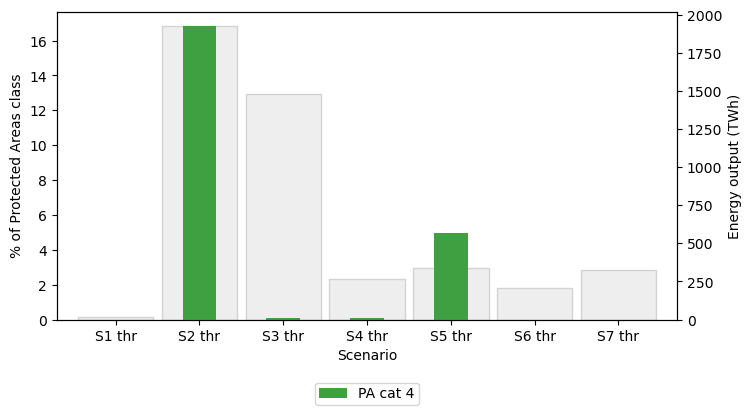

In [149]:
# PAs
plot_stats('PAs','Protected Areas', ['#3ea041','#026b05'],0.4)

## Combo area + footprint in one chart

In [133]:
### Plot AREA stats ###
# Requires cat = string for name of category, to find in Comparison {cat} stats.xlsx
# catnm = name of class to display in left Y axis
# and color = list of colors for bars
def plot_combo_stats(cat, catnm, color, width1, small_bars_width, small_bars_spacing, small_bars_N, bar_groups_N, small_bars_color):
    # Select stats df
    stats_df = pd.read_excel(f'{output_path}stats/Comparison {cat} stats.xlsx')
    stats_dfT = stats_df.set_index('Unnamed: 0')
    stats_dfT = stats_dfT.T # transpose for plotting
    stats_dfT.drop(columns=0, inplace=True) # drop the pesky 0 column that gets created when writing to Excel
    # Select columns to plot
    cols_leftY = []
    for i in range(1,8):
        cols_leftY.append(f'S{i}_thr_Total footprint (% of category area)')
    cols_leftY1 = []
    for i in range(1,8):
        cols_leftY1.append(f'S{i}_thr_Total Area (% of category area)')
    cols_rightY = []
    for i in range(1,8):
        cols_rightY.append(f'S{i} thr')
    
    # Plot
    fig,ax=plt.subplots(figsize=(8,4))
    ax1 = ax.twinx()
    stats_dfT.loc[cols_leftY].plot.bar(ax=ax1, width=width1, color = color)
    # Code to space out bars from 
    # https://stackoverflow.com/questions/66913686/how-to-get-spacing-between-grouped-bar-plot
    ind = np.arange(bar_groups_N) # index / x-axis value # number here is number of bar groups
    width = small_bars_width # width of each bar
    DistBetweenBars = small_bars_spacing # distance between bars
    Num = small_bars_N # number of bars in a group
    # calculate the width of the grouped bars (including the distance between the individual bars)
    WithGroupedBars = Num*width + (Num-1)*DistBetweenBars
    data = stats_dfT.loc[cols_leftY1]
    for i,j in zip(range(Num), data):
        ax1.bar(ind-WithGroupedBars/2 + (width+DistBetweenBars)*i,data[j], width, color = small_bars_color)
    # Adding energy on second axis
    ener_df.loc[cols_rightY,'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
    plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
    ax1.yaxis.tick_left() # moving y axis to opposite side
    ax1.yaxis.set_label_position('left') # moving y axis to opposite side
    ax.yaxis.tick_right() # moving y axis to opposite side
    ax.yaxis.set_label_position('right') # moving y axis to opposite side
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
    ax1.set_ylabel(f'% of {catnm} class')
    ax.set_ylabel('Energy output (TWh)')
    # Save to file
    plt.savefig(f'{workFiles_path}media/charts/{cat} combo stats.png',dpi=300, bbox_inches='tight')
    
    plt.show()

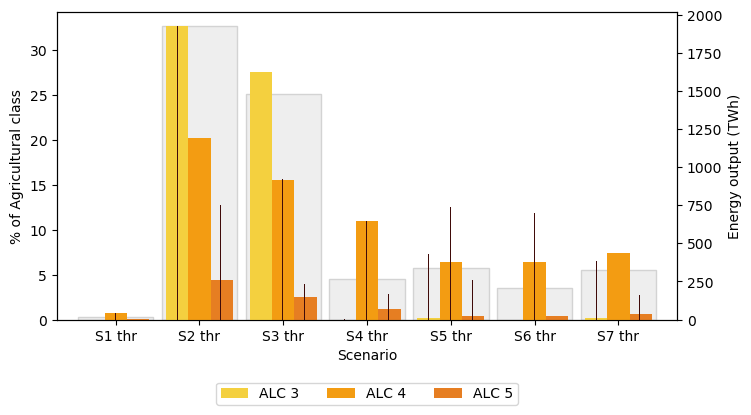

In [135]:
# Agri
plot_combo_stats('Agri', 'Agricultural', ['#f4d03f','#f39c12','#e67e22'],0.8, 0.01, 0.25, 3, 7, '#400b09')

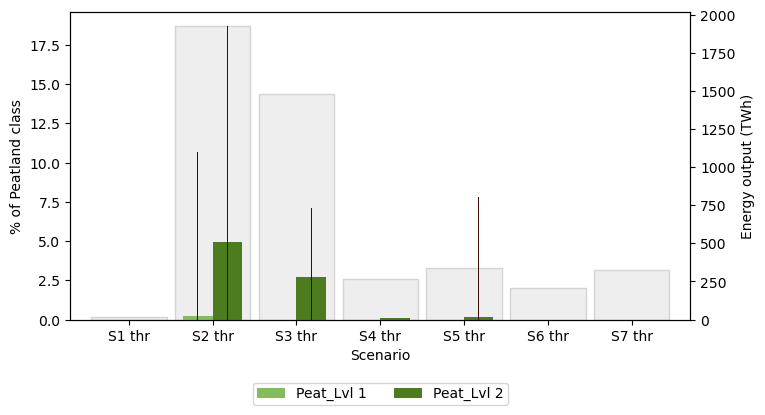

In [139]:
# Peat
plot_combo_stats('Peat','Peatland', ['#84bb5b','#4d7c1e'],0.7, 0.01, 0.35, 2, 7, '#400b09')

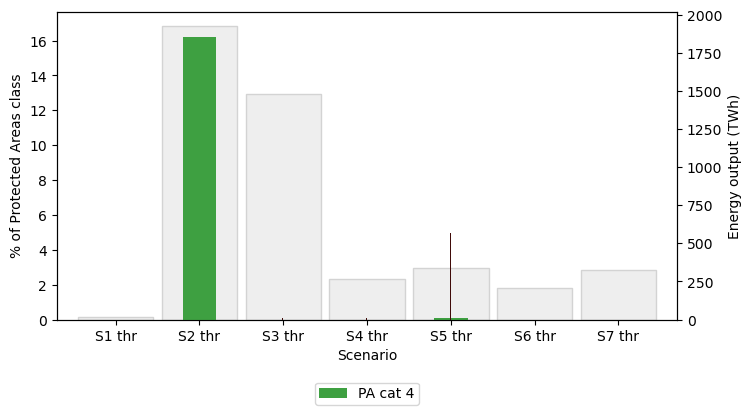

In [145]:
# PAs
plot_combo_stats('PAs','Protected Areas', ['#3ea041','#026b05'],0.4, 0.01, 0.35, 1, 7, '#400b09')

## Footprint

In [129]:
### Plot FOOTPRINT stats ###
# Requires cat = string for name of category, to find in Comparison {cat} stats.xlsx
# catnm = name of class to display in left Y axis
# and color = list of colors for bars
def plot_footprint_stats(cat, catnm, color, width1):
    # Select stats df
    stats_df = pd.read_excel(f'{output_path}stats/Comparison {cat} stats.xlsx')
    stats_dfT = stats_df.set_index('Unnamed: 0')
    stats_dfT = stats_dfT.T # transpose for plotting
    stats_dfT.drop(columns=0, inplace=True) # drop the pesky 0 column that gets created when writing to Excel
    # Select columns to plot
    cols_leftY = []
    for i in range(1,8):
        cols_leftY.append(f'S{i}_thr_Total footprint (% of category area)')
    cols_leftY
    cols_rightY = []
    for i in range(1,8):
        cols_rightY.append(f'S{i} thr')
    cols_rightY
    
    # Plot
    fig,ax=plt.subplots(figsize=(8,4))
    ax1 = ax.twinx()
    stats_dfT.loc[cols_leftY].plot.bar(ax=ax1, width=width1, color = color)
    ener_df.loc[cols_rightY,'Total Production, co-location (TWh)'].plot.bar(ax=ax, width=0.9, edgecolor = 'lightgrey', zorder=0.5, facecolor='#eeeeee')
    plt.legend( loc='lower center', borderpad=0.3, ncol=5, bbox_to_anchor=(0.5, -0.3))
    ax1.yaxis.tick_left() # moving y axis to opposite side
    ax1.yaxis.set_label_position('left') # moving y axis to opposite side
    ax.yaxis.tick_right() # moving y axis to opposite side
    ax.yaxis.set_label_position('right') # moving y axis to opposite side
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0)
    ax1.set_ylabel(f'% of {catnm} class')
    ax.set_ylabel('Energy output (TWh)')
    # Save to file
    plt.savefig(f'{workFiles_path}media/charts/{cat} footprint stats.png',dpi=300, bbox_inches='tight')
    
    plt.show()

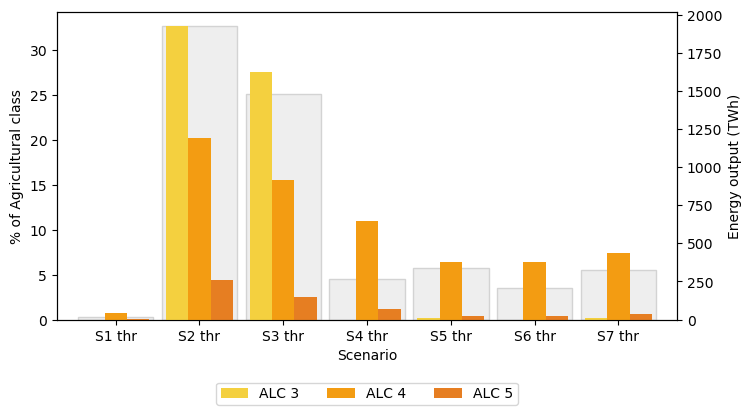

In [141]:
# Agri
plot_footprint_stats('Agri', 'Agricultural', ['#f4d03f','#f39c12','#e67e22'],0.8)

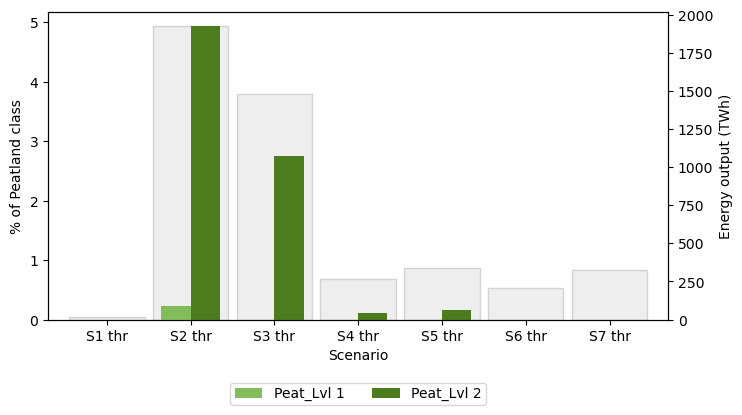

In [142]:
# Peat
plot_footprint_stats('Peat','Peatland', ['#84bb5b','#4d7c1e'],0.7)

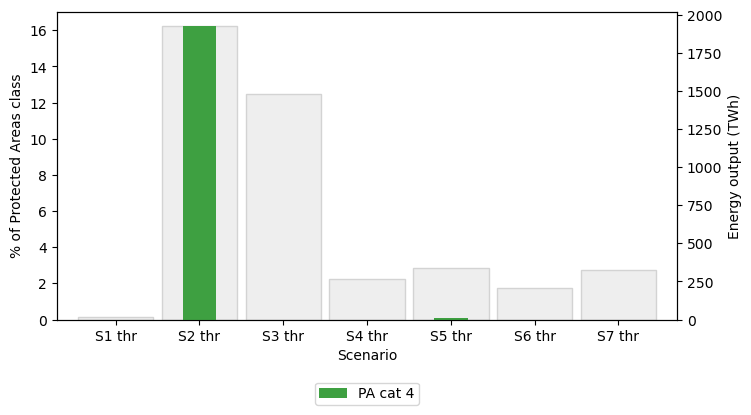

In [143]:
# PAs
plot_footprint_stats('PAs','Protected Areas', ['#3ea041','#026b05'],0.4)

# Various

## Raster histograms

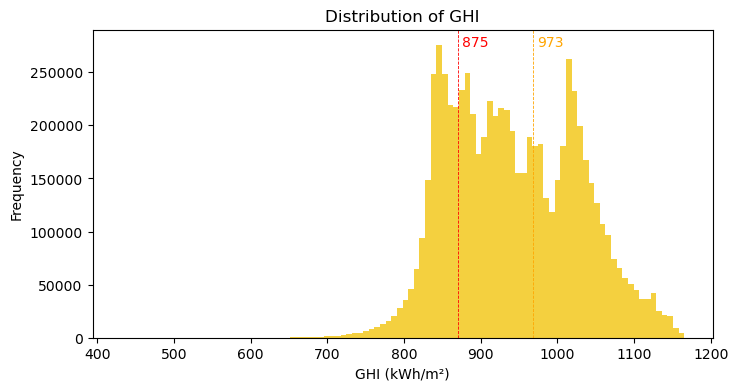

In [31]:
from rasterio.plot import show_hist
raster_path = f'{rawDat_path}Solar tech layers/United-Kingdom_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/GHI.tif'
with rio.open(raster_path) as src:
    raster =  src.read(1)
    fig, ax = plt.subplots(figsize = (8,4))
    ax.hist(raster.flatten(), bins = 100, color = '#f4d03f')
    ax.set(title="Distribution of GHI", xlabel='GHI (kWh/m²)',ylabel='Frequency')
    ax.vlines(x=875-5, color = 'red', linestyles= '--', linewidth = 0.6, ymin=0, ymax=290000)
    ax.text(x=875, y=274000, color = 'red', s='875',  fontsize = 10)
    ax.vlines(x=973-5, color = 'orange', linestyles= '--', linewidth = 0.6, ymin=0, ymax=290000)
    ax.text(x=973, y=274000, color = 'orange', s='973',  fontsize = 10)
    ax.set_ylim(top=290000)
    
    plt.savefig(f'{workFiles_path}media/charts/GHI hist',dpi=300, bbox_inches='tight')
    plt.show()